# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Orçun Şimşek</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read csv
data=pd.read_csv("diamonds.csv")

In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Exploratory Data Analysis

In [6]:
# Our label Distribution (countplot)
data.groupby(by="cut").count()

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082,12082


C:\Users\orcun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

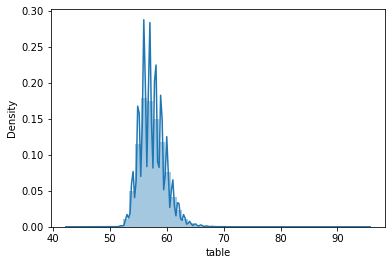

In [7]:
# Example EDA (distplot)
sns.distplot(data["table"])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
data.duplicated().sum()

0

In [10]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data.loc[:, data.describe().columns]))
z

outliers = list(set(np.where(z > 3)[0]))
len(outliers)

2350

In [11]:
new_data = data.drop(outliers,axis = 0).reset_index(drop = False)
display(new_data)

,index,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...
51585,53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
51586,53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
51587,53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
51588,53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
X = new_data.iloc[:,1:-1]
y = new_data.iloc[:,-1]

In [13]:
from sklearn.preprocessing import LabelEncoder

new_X = X.copy()
new_X['cut'] = new_X['cut'].map({'Fair':1, 'Good': 2, 'Very Good': 3, 'Premium':4, 'Ideal':5})
new_X = pd.get_dummies(data = new_X, columns = ['color','clarity'])

encoder = LabelEncoder()
y = encoder.fit_transform(y)
categories = encoder.inverse_transform([0,1,2,3,4])

new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51590 entries, 0 to 51589
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    51590 non-null  int64  
 1   carat         51590 non-null  float64
 2   cut           51590 non-null  int64  
 3   depth         51590 non-null  float64
 4   table         51590 non-null  float64
 5   price         51590 non-null  int64  
 6   x             51590 non-null  float64
 7   y             51590 non-null  float64
 8   color_D       51590 non-null  uint8  
 9   color_E       51590 non-null  uint8  
 10  color_F       51590 non-null  uint8  
 11  color_G       51590 non-null  uint8  
 12  color_H       51590 non-null  uint8  
 13  color_I       51590 non-null  uint8  
 14  color_J       51590 non-null  uint8  
 15  clarity_I1    51590 non-null  uint8  
 16  clarity_IF    51590 non-null  uint8  
 17  clarity_SI1   51590 non-null  uint8  
 18  clarity_SI2   51590 non-nu

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.3, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train_scaled, y_train)

train_score = model_dtc.score(X_train_scaled,y_train)
test_score = model_dtc.score(X_test_scaled,y_test)

pred = model_dtc.predict(X_test_scaled)

In [19]:
print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)

Accuracy of train: 1.0
Accuracy of test: 0.40712024294113847


In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
print(classification_report(y_test,pred))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          14       0.50      0.67      0.57         3
          15       0.00      0.00      0.00         1
          16       1.00      0.25      0.40         4
          17       0.33      0.25      0.29         4
          18       0.43      0.60      0.50         5
          19       0.44      0.50      0.47         8
          20       0.33      0.64      0.44        11
          21       0.31      0.22      0.26        18
          22       0.27    

C:\Users\orcun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orcun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orcun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orcun\anaconda3\lib\site-packages\sklearn\metrics\_classification.p

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train ,y_train, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test_scaled ,y_test)))

C:\Users\orcun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Mean training accuracy: 0.07916806496739373
Test accuracy: 0.07818052594171997


# Support vector machines (SVM)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

C:\Users\orcun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.